# Generate StyleGAN2 tensorflow


* Auto compiles
`fused_bias_act.cu`
`upfirdn_2d.cu`
### pkls
* https://drive.google.com/drive/folders/1yanUI9m4b4PWzR0eurKNq6JR1Bbfbh6L
* ../stylegan2/networks/
### results
../stylegan2/results

### future work identified, projection of images from the wild:

In [1]:
import os
import os.path as osp
import requests
from io import BytesIO
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

tf.__version__

/home/z/miniconda3/envs/abg8/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/z/miniconda3/envs/abg8/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/z/miniconda3/envs/abg8/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/z/miniconda3/envs/abg8/lib/python3.6/site-packages/tensorf

'1.14.0'

### variables

In [2]:
# stylegan2 folder is encoded on git clone --recursive=
stylegan2 = osp.abspath("..")
results_folder = osp.abspath("../results")

In [3]:
def show_imgfolder(folder, imsz, ncols, nrows, saveas=None):
    # imsz shouldb e from image
    read=True
    if isinstance(folder, str) and osp.isdir(folder):
        imgs = sorted([osp.join(folder,f) for f in os.listdir(folder) if f[-4:] in (".png", ".jpg")])
    elif isinstance(folder, list):
        if isinstance(folder[0], (Image.Image, np.ndarray)):
            imgs = folder
            read = False
        elif isinstance(folder[0], str) and osp.isfile(folder[0]):
            imgs = [f for f in folder]
        
    image = (np.ones([imsz*nrows,imsz*ncols,3])*255).astype(int)
    plt.figure(figsize=(20,20))
    for i, img in enumerate(imgs):
        j = (i%ncols)*imsz
        k = (i//ncols)*imsz
        img = np.array(Image.open(img)) if read else img
        image[k:k+imsz,j:j+imsz,:] = img
        
    if isinstance(saveas, str):
        if saveas[-4:].lower() not in (".jpg", ".png"):
            saveas = saveas+".png"
        saveas = osp.abspath(osp.expanduser(saveas))
        if not osp.isfile(saveas):
            img = Image.fromarray(image.astype(np.uint8))
            img.save(saveas)
    plt.imshow(image)
    plt.show()

### generated with code from stylegan2/README.md
`python run_generator.py generate-images --network=networks/stylegan2-ffhq-config-f.pkl --seeds=6600-6625`

True /home/z/work/stylegan2/stylegan2/results
True /home/z/work/stylegan2/stylegan2/results/00000-generate-images


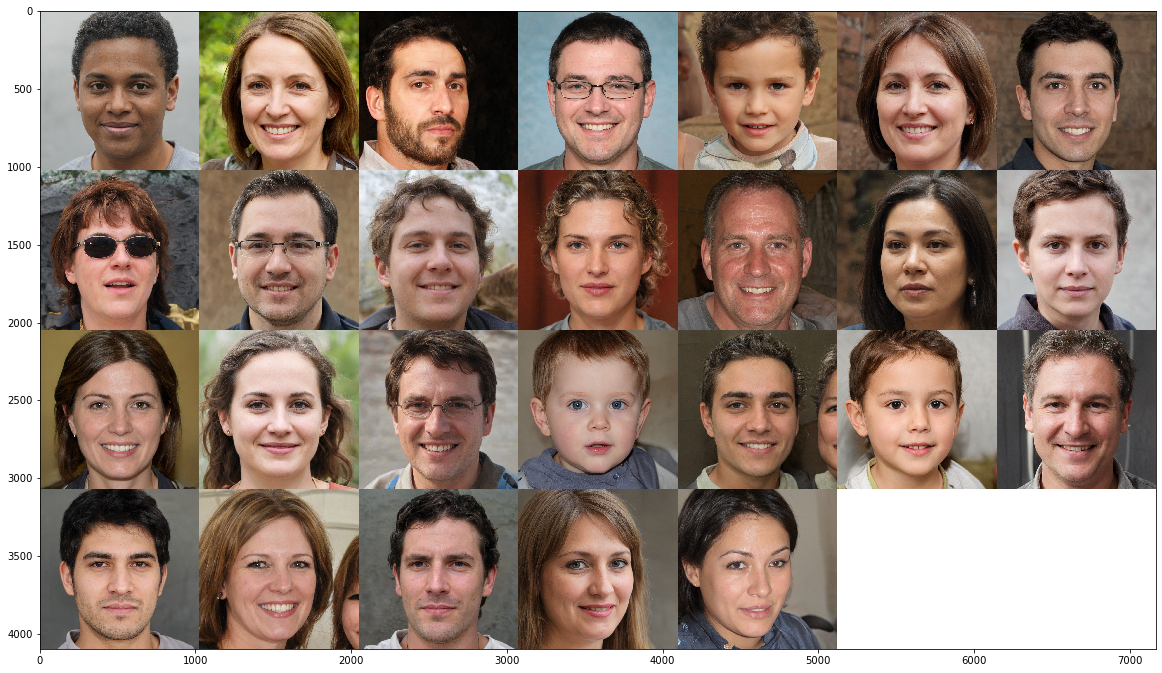

In [4]:
gimgs = osp.join(results_folder, "00000-generate-images")
print(osp.isdir(results_folder), results_folder)
print(osp.isdir(gimgs), gimgs)
show_imgfolder(folder=gimgs, imsz=1024, ncols=7, nrows=4)

`python run_generator.py generate-images --network=networks/stylegan2-ffhq-config-f.pkl --seeds=66,230,389,1518 --truncation-psi=1.0`

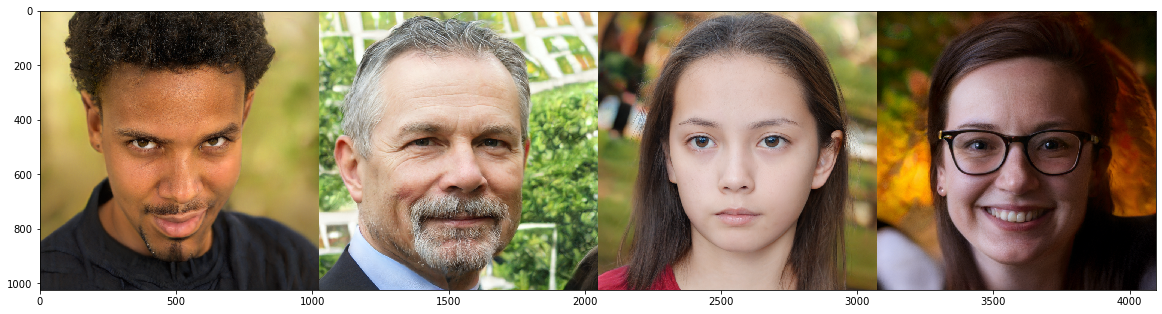

In [5]:
gimgs = osp.join(results_folder, "00001-generate-images")
show_imgfolder(folder=gimgs, imsz=1024, ncols=4, nrows=1)

`python run_generator.py generate-images --network=networks/stylegan2-car-config-f.pkl --seeds=6000-6025 --truncation-psi=0.5`

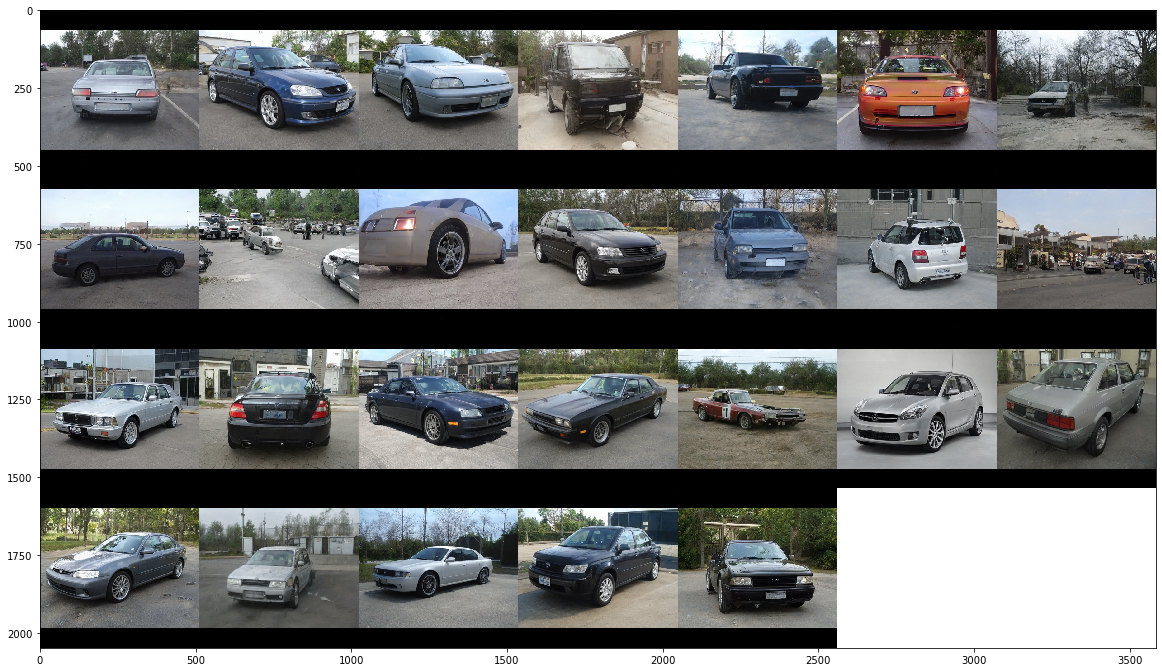

In [6]:
gimgs = osp.join(results_folder, "00002-generate-images")
show_imgfolder(folder=gimgs, imsz=512, ncols=7, nrows=4)

`python run_generator.py style-mixing-example --network=networks/stylegan2-ffhq-config-f.pkl --row-seeds=85,100,75,458,1500 --col-seeds=55,821,1789,293 --truncation-psi=1.0`

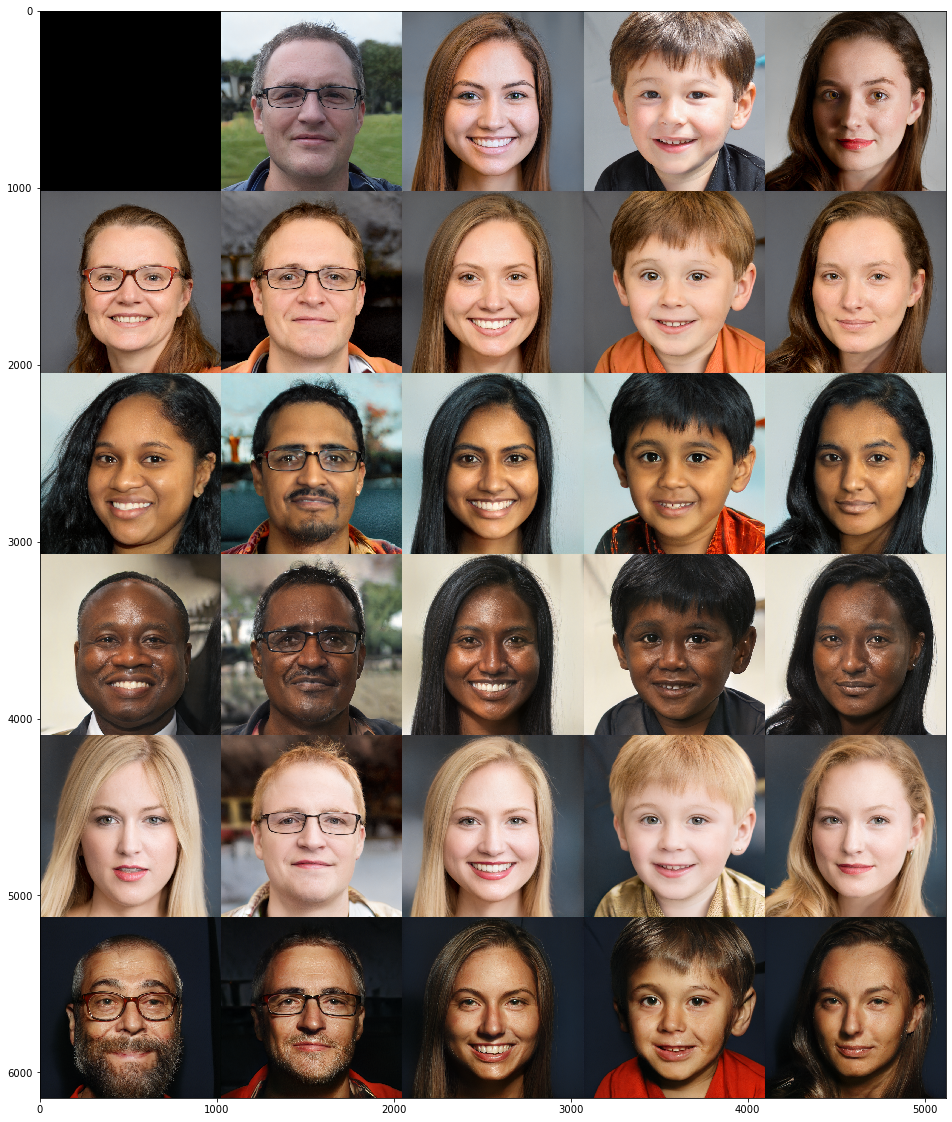

In [7]:
plt.figure(figsize=(20,20))
plt.imshow(Image.open(osp.join(results_folder, "00003-style-mixing-example/grid.png")))
plt.show()

## Projection of real images onto latent space
    * project images from the wild
    * project images generated by stylegan
        * conclusion. the latent space of StyleGAN needs tob e expanded

`python run_projector.py project-generated-images --network=networks/stylegan2-car-config-f.pkl --seeds=0,1,5`

* Downloads http://d36zk2xti64re0.cloudfront.net/stylegan1/networks/metrics/vgg16_zhang_perceptual.pkl


In [8]:
def loadimg(url, crop=None):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    if crop is not None:
        img = img.crop(crop)
    return img

def scrape(urls, store_folder, crops=None, ext=".jpg"):
    for i, url in enumerate(urls):
        crop = None if crops is None else crops[i]
        img = loadimg(url, crop)
        img.save(osp.join(store_folder, url.split("=")[-1]+ext))

In [9]:
url0 ="https://i.guim.co.uk/img/media/c7662daf2d0ca9e59cdfef659c8d86e1da7b4f7e/318_0_4800_2880/master/4800.jpg?width=1920&quality=85&auto=format&fit=max&s=284ad659f3663f2cae8e78b1de09225e"
url1 ="https://i.guim.co.uk/img/media/528a80d5119aeff64856ec837fdd7d06a2beb0c1/0_0_4800_3200/master/4800.jpg?width=1920&quality=85&auto=format&fit=max&s=24501d47b989e9cdade6826b9ac5079a"
url2 ="https://i.guim.co.uk/img/media/c1355920f4ffe54dc9552043f2c8e7e893f39032/1094_344_2788_1673/master/2788.jpg?width=1920&quality=85&auto=format&fit=max&s=6c31da2732b75a999adbbc42f099a744"
crop0 = (496, 0, 496+1024, 1024)
crop1 = (380, 0, 380+1024, 1024)
crop2 = (420, 0, 420+1024, 1024)

data_folder = osp.expanduser("~/data/Face/scrape/")
if not osp.isdir(data_folder):
    os.makedirs(data_folder)
if len(os.listdir(data_folder)) == 0:
    scrape([url0, url1, url2], store_folder=data_folder, crops=[crop0, crop1, crop2])

In [10]:
os.listdir(data_folder)

['6c31da2732b75a999adbbc42f099a744.jpg',
 '284ad659f3663f2cae8e78b1de09225e.jpg',
 '24501d47b989e9cdade6826b9ac5079a.jpg']

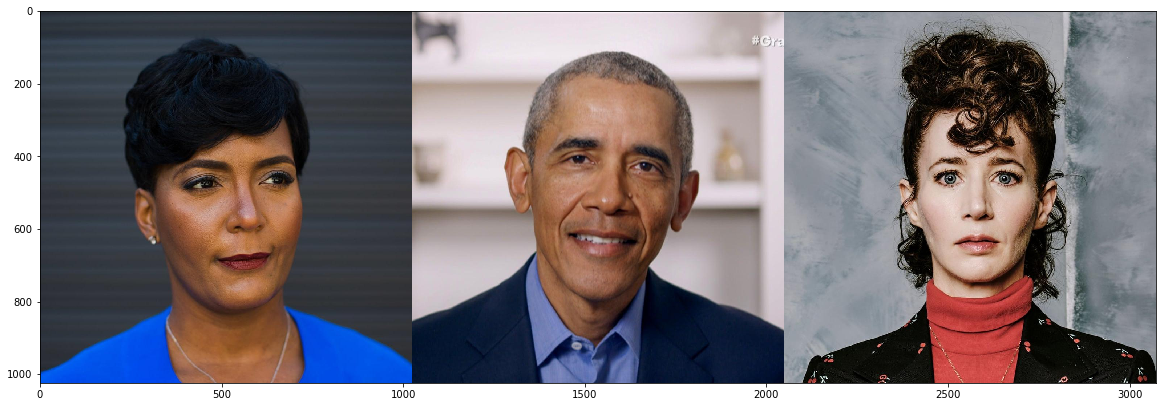

In [11]:
show_imgfolder(data_folder, imsz=1024, ncols=3, nrows=1)

## Uncomment and run next 2 cells to generate projections

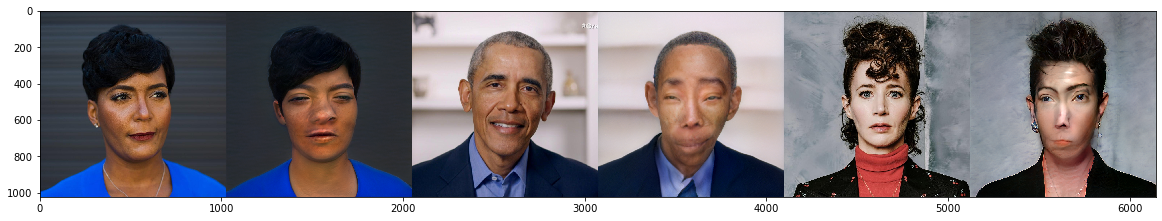

In [12]:
results = osp.join(osp.abspath(".."), "results")
folder = max([osp.join(results,f) for f in os.listdir(results) if osp.isdir(osp.join(results,f))],
             key=osp.getmtime)
ls = ["image0000-target.png", "image0000-step1000.png", "image0001-target.png", "image0001-step1000.png",
           "image0002-target.png", "image0002-step1000.png"]
ls = [osp.join(folder, f) for f in ls]
show_imgfolder(ls, imsz=1024, ncols=6, nrows=1, saveas="../docs/project_fromwild.png")

### projecting  images generated by StyleGAN2 on the other hand, does a great job.

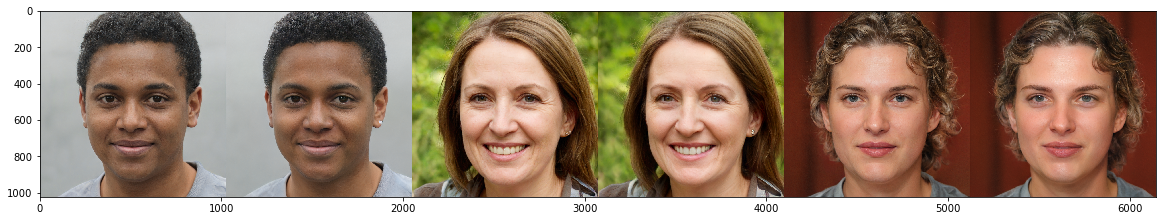

In [13]:
folder = osp.join(results, "00008-project-real-images")
ls = ["image0000-target.png", "image0000-step1000.png", "image0001-target.png", "image0001-step1000.png",
           "image0002-target.png", "image0002-step1000.png"]
ls = [osp.join(folder, f) for f in ls]
show_imgfolder(ls, imsz=1024, ncols=6, nrows=1, saveas="../docs/project_generated.png")